In [1]:
import matplotlib.pyplot as plt


def print_graph(predicted, x_train, y_train):
    plt.clf()
    plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
    plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
    plt.legend(loc='best')
    plt.show()

In [2]:
import numpy as np
import torch
from sail_safe_functions.machine_learning.models.LinearRegression import LinearRegression

# create dummy data for training
x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)
x_train = torch.from_numpy(x_train)

y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)
y_train = torch.from_numpy(y_train)

data_federation = [[x_train, y_train], [x_train, y_train]]

in_layer = 1
out_layer = 1
optimizer = "SGD"
criterion = "MSELoss"
starting_model = LinearRegression(in_layer, out_layer)
epochs = 100
learn_rate = 0.01

In [3]:
from sail_safe_functions.machine_learning.utilities.ModelUtility import ModelUtility

origin = starting_model(data_federation[0][0])
params = ModelUtility.get_parameters_as_tensor(starting_model)
starting_model = ModelUtility.set_parameters_from_tensor(LinearRegression(in_layer, out_layer), params)
post = starting_model(data_federation[0][0])

if origin.equal(post):
    print("parameter grabbing working properly")

parameter grabbing working properly


RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

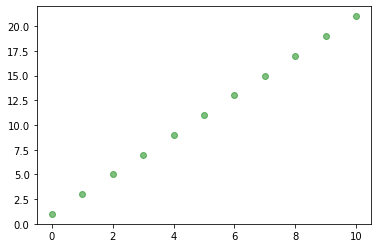

In [9]:
print_graph(starting_model(data_federation[0][0]).data.numpy(), x_train, y_train)


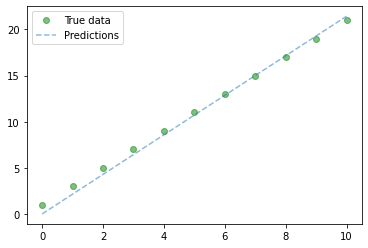

In [4]:
from sail_safe_functions.machine_learning.utilities.ModelTrain import ModelTrain
from sail_safe_functions.machine_learning.utilities.ModelUtility import ModelUtility

#Train a single model on a single SCN
trained_model= ModelTrain.run(epochs, data_federation[0], learn_rate, starting_model, criterion, optimizer)
# trained_model= ModelUtility.set_parameters_from_tensor(LinearRegression(in_layer, out_layer), params)
predicted = trained_model(x_train).data.numpy()

print_graph(predicted, x_train, y_train)


In [5]:
trained_model.model.in_features

1

#

In [6]:
from sail_safe_functions.machine_learning.utilities.ModelAverage import ModelAverage

trained_models = []
avg_model = trained_model

# Train a model with every member of our data federation
for j in range(len(data_federation)):
    trained_models.append(ModelTrain.run(epochs, data_federation[j], learn_rate, avg_model, criterion, optimizer))
avg_model = ModelAverage.run(trained_models)

avg_model

LinearRegression(
  (model): Linear(in_features=1, out_features=1, bias=False)
)

### Retrieving Model from Parameters

In [7]:
from sail_safe_functions.machine_learning.utilities.ModelRetrieve import ModelRetrieve

#Retrieve Averaged Model
avg_model = ModelRetrieve.run(avg_model)

avg_model

LinearRegression(
  (model): Linear(in_features=1, out_features=1, bias=False)
)

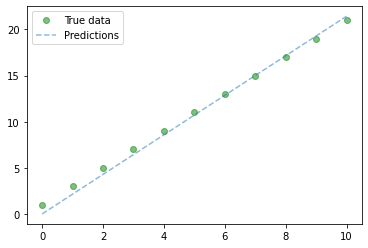

In [8]:
predictions = avg_model(x_train).data.numpy()
print_graph(predicted, x_train, y_train)